LIBRARIES

In [ ]:
pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.4 MB/s eta 0:00:00


In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))


TensorFlow version: 2.17.1
GPU available: []


In [ ]:
pip install keras==2.3.1

In [ ]:
pip install pandas numpy pyvi

In [ ]:
TOKENIZER_FILE = '/path/to/tokenizer.pkl'

In [ ]:
pip install tensorflow-gpu==2.8

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 39.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.2
    Uninstalling tensorboard-data-server-0.7.2:
      Successfully uninstalled tensorboard-data-server-0.7.2
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: goo

DATA LOADER

In [ ]:
import pandas as pd
import numpy as np
import zipfile

DATA = '/content/vihsd (1).zip'
DEV_DATA = '/content/vihsd (1).zip'
TEST_DATA = '/content/vihsd (1).zip'

# read data
# Specify the file within the zip archive
with zipfile.ZipFile(DATA, 'r') as zip_ref:
    train_data = pd.read_csv(zip_ref.open('vihsd/train.csv'))  # Assuming 'train.csv' is in a folder 'vihsd' within the zip

with zipfile.ZipFile(DEV_DATA, 'r') as zip_ref:
    dev_data = pd.read_csv(zip_ref.open('vihsd/dev.csv'))  # Assuming 'dev.csv' is in a folder 'vihsd' within the zip

with zipfile.ZipFile(TEST_DATA, 'r') as zip_ref:
    test_data = pd.read_csv(zip_ref.open('vihsd/test.csv'))  # Assuming 'test.csv' is in a folder 'vihsd' within the zip


print(len(train_data))
print(len(dev_data))
print(len(test_data))

X_train = train_data['free_text']
y_train = train_data['label_id'].values

X_dev = dev_data['free_text']
y_dev = dev_data['label_id'].values

X_test = test_data['free_text']
y_test = test_data['label_id'].values

24048
2672
6680


In [ ]:
import pandas as pd
import re
import numpy as np
from pyvi.ViTokenizer import ViTokenizer

# Paths to the CSV files
STOPWORDS_CSV = '/content/dev[1].csv'
TRAIN_CSV = '/content/train.csv'
TEST_CSV = '/content/test.csv'

# Function to load stopwords from the CSV file
def load_stopwords(csv_path):
    try:
        stopwords_df = pd.read_csv(csv_path, header=None)
        stopwords = set(stopwords_df[0].str.strip())
        print("Stopwords loaded successfully.")
        return stopwords
    except Exception as e:
        raise ValueError(f"Error loading stopwords from {csv_path}: {e}")

# Debugging function to inspect dataset columns
def inspect_csv_columns(csv_path):
    try:
        df = pd.read_csv(csv_path)
        print(f"Columns in {csv_path}: {df.columns.tolist()}")
    except Exception as e:
        print(f"Error inspecting {csv_path}: {e}")

# Supporting functions
def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split() if word not in stop_words]
    return ' '.join(new_sent)

def deEmojify(text):
    regrex_pattern = re.compile(pattern="["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return regrex_pattern.sub(r'', text)

def preprocess(text, tokenized=True, lowercased=True):
    text = ViTokenizer.tokenize(text) if tokenized else text
    text = filter_stop_words(text, stopwords)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    return text

def pre_process_features(X, y, tokenized=True, lowercased=True):
    X = [preprocess(str(p), tokenized=tokenized, lowercased=lowercased) for p in list(X)]
    valid_indices = [idx for idx, ele in enumerate(X) if ele]
    X = [X[idx] for idx in valid_indices]
    y = [y[idx] for idx in valid_indices]
    return X, y

# Load stopwords
try:
    stopwords = load_stopwords(STOPWORDS_CSV)
    print("Loaded stopwords:", stopwords)
except Exception as e:
    print("Error loading stopwords:", e)

# Inspect the columns in train and test datasets
inspect_csv_columns(TRAIN_CSV)
inspect_csv_columns(TEST_CSV)

# Load and preprocess the train and test datasets
try:
    # Using the actual column names based on your inspection
    text_column = 'free_text'  # Correct column name for text
    label_column = 'label_id'  # Correct column name for labels

    train_df = pd.read_csv(TRAIN_CSV)
    test_df = pd.read_csv(TEST_CSV)

    # Extract features and labels
    X_train, y_train = train_df[text_column], train_df[label_column]
    X_test, y_test = test_df[text_column], test_df[label_column]

    # Preprocess features
    X_train, y_train = pre_process_features(X_train, y_train)
    X_test, y_test = pre_process_features(X_test, y_test)

    print("Data preprocessing completed successfully.")
except Exception as e:
    print(f"Error loading or preprocessing data: {e}")


Error loading stopwords: Error loading stopwords from /content/dev[1].csv: [Errno 2] No such file or directory: '/content/dev[1].csv'
Columns in /content/train.csv: ['free_text', 'label_id']
Columns in /content/test.csv: ['free_text', 'label_id']
Data preprocessing completed successfully.


In [ ]:
!pip install pyvi
import pandas as pd
import re
import numpy as np
from pyvi.ViTokenizer import ViTokenizer

# ... (Rest of your code) ...

RUN MODELS

CONVOLUTIONAL NEURAL NETWORKS (CNN)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 75s 392ms/step - accuracy: 0.8070 - loss: 0.7585 - val_accuracy: 0.8196 - val_loss: 0.5839
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 392ms/step - accuracy: 0.8300 - loss: 0.5623 - val_accuracy: 0.8196 - val_loss: 0.5545
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 393ms/step - accuracy: 0.8358 - loss: 0.4976 - val_accuracy: 0.8409 - val_loss: 0.4611
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 74s 391ms/step - accuracy: 0.8621 - loss: 0.3981 - val_accuracy: 0.8503 - val_loss: 0.4158
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 392ms/step - accuracy: 0.8791 - loss: 0.3355 - val_accuracy: 0.8548 - val_loss: 0.4029
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 74s 392ms/step - accuracy: 0.8905 - loss: 0.2920 - val_accuracy: 0.8548 - val_loss: 0.3951
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 392ms/step - accuracy: 0.9038 - loss: 0.2609 - val_accuracy: 0.8559 - val_loss: 0.4007
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 397ms/step - accuracy: 0.9146 - loss: 0

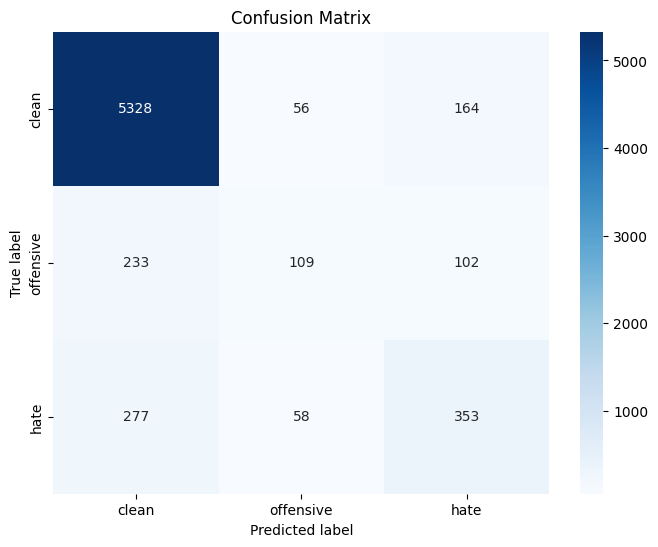

Accuracy for class 'clean': 0.96
Accuracy for class 'offensive': 0.25
Accuracy for class 'hate': 0.51

Metrics for Offensive Class:
Precision: 0.49
Recall: 0.25
F1-Score: 0.33
Support: 444.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# File paths
TRAIN_FILE = '/content/train.csv'
DEV_FILE = '/content/dev.csv'
TEST_FILE = '/content/test.csv'

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['free_text'] = df['free_text'].fillna('').astype(str)  # Handle missing text
    return df['free_text'].values, df['label_id'].values

X_train, y_train = load_data(TRAIN_FILE)
X_dev, y_dev = load_data(DEV_FILE)
X_test, y_test = load_data(TEST_FILE)

# Tokenizer and preprocessing
tokenizer = Tokenizer(num_words=30000)  # Use top 30,000 words
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

def preprocess_text(X, y, tokenizer, maxlen=120):  # Increased maxlen
    """Tokenize and pad text sequences, one-hot encode labels."""
    X_seq = tokenizer.texts_to_sequences(X)
    X_pad = pad_sequences(X_seq, maxlen=maxlen)  # Pad sequences to the same length
    y_cat = to_categorical(y, num_classes=3)  # One-hot encode labels
    return X_pad, y_cat

maxlen = 120  # Adjusted sequence length
X_train_pad, y_train_cat = preprocess_text(X_train, y_train, tokenizer, maxlen)
X_dev_pad, y_dev_cat = preprocess_text(X_dev, y_dev, tokenizer, maxlen)
X_test_pad, y_test_cat = preprocess_text(X_test, y_test, tokenizer, maxlen)

# Build CNN model with variations
embedding_dim = 128
input_layer = Input(shape=(maxlen,))

# Experimenting with different CNN layer parameters
x = Embedding(input_dim=30000, output_dim=embedding_dim)(input_layer)
x = Conv1D(256, kernel_size=5, activation='relu')(x)  # Increased filters and kernel size
x = GlobalMaxPooling1D()(x)  # Global max pooling
x = Dense(256, activation='relu')(x)  # Increased units in Dense layer
x = Dropout(0.6)(x)  # Increased dropout rate
output_layer = Dense(3, activation='softmax')(x)  # 3 classes: clean, offensive, hate

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with increased epochs and batch size
model.fit(X_train_pad, y_train_cat, batch_size=128, epochs=10, validation_data=(X_dev_pad, y_dev_cat), verbose=1)  # Increased epochs

# Evaluate the model
y_pred = model.predict(X_test_pad, batch_size=128).argmax(axis=-1)  # Predicted classes
y_true = y_test  # True classes

# Classification report
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=["clean", "offensive", "hate"], output_dict=True)
print(classification_report(y_true, y_pred, target_names=["clean", "offensive", "hate"]))

# Confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
print("\nConfusion Matrix:")
print(cf_matrix)

# Plot confusion matrix
labels = ["clean", "offensive", "hate"]
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate per-class accuracy
accuracy_per_class = cf_matrix.diagonal() / cf_matrix.sum(axis=1)
for i, label in enumerate(labels):
    print(f"Accuracy for class '{label}': {accuracy_per_class[i]:.2f}")

# Explicit Offensive Class Metrics
offensive_metrics = report["offensive"]
print("\nMetrics for Offensive Class:")
print(f"Precision: {offensive_metrics['precision']:.2f}")
print(f"Recall: {offensive_metrics['recall']:.2f}")
print(f"F1-Score: {offensive_metrics['f1-score']:.2f}")
print(f"Support: {offensive_metrics['support']}")


LONG SHORT TERM MEMORY (LSTM)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.8156 - loss: 0.6865 - val_accuracy: 0.8196 - val_loss: 0.5834
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8275 - loss: 0.5628 - val_accuracy: 0.8196 - val_loss: 0.5763
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.8264 - loss: 0.5512 - val_accuracy: 0.8204 - val_loss: 0.5520
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.8333 - loss: 0.5069 - val_accuracy: 0.8387 - val_loss: 0.4584
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.8598 - loss: 0.4074 - val_accuracy: 0.8462 - val_loss: 0.4273
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.8688 - loss: 0.3520 - val_accuracy: 0.8462 - val_loss: 0.4167
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.8837 - loss: 0.3180 - val_accuracy: 0.8503 - val_loss: 0.4104
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8866 - loss: 0.3005 - val_accu

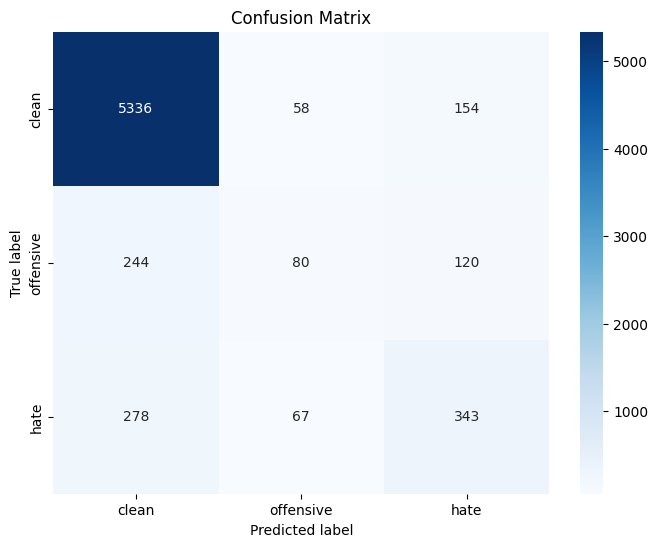

Accuracy for class 'clean': 0.96
Accuracy for class 'offensive': 0.18
Accuracy for class 'hate': 0.50


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, SpatialDropout1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Dropout, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# File paths
TRAIN_FILE = '/content/train.csv'
DEV_FILE = '/content/dev.csv'
TEST_FILE = '/content/test.csv'

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['free_text'] = df['free_text'].fillna('').astype(str)  # Handle missing text
    return df['free_text'].values, df['label_id'].values

X_train, y_train = load_data(TRAIN_FILE)
X_dev, y_dev = load_data(DEV_FILE)
X_test, y_test = load_data(TEST_FILE)

# Tokenizer and preprocessing
tokenizer = Tokenizer(num_words=25000)  # Increased number of words in tokenizer
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

def preprocess_text(X, y, tokenizer, maxlen=150):  # Adjusted maxlen
    """Tokenize and pad text sequences, one-hot encode labels."""
    X_seq = tokenizer.texts_to_sequences(X)
    X_pad = pad_sequences(X_seq, maxlen=maxlen)  # Pad sequences to the same length
    y_cat = to_categorical(y, num_classes=3)  # One-hot encode labels
    return X_pad, y_cat

maxlen = 150  # Adjusted sequence length
X_train_pad, y_train_cat = preprocess_text(X_train, y_train, tokenizer, maxlen)
X_dev_pad, y_dev_cat = preprocess_text(X_dev, y_dev, tokenizer, maxlen)
X_test_pad, y_test_cat = preprocess_text(X_test, y_test, tokenizer, maxlen)

# Build modified model
embedding_dim = 128
input_layer = Input(shape=(maxlen,))
x = Embedding(input_dim=25000, output_dim=embedding_dim)(input_layer)
x = SpatialDropout1D(0.3)(x)  # Increased dropout rate
x = Bidirectional(LSTM(100, return_sequences=True))(x)  # Bidirectional LSTM
x = GRU(50, return_sequences=True)(x)  # Added GRU layer
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dropout(0.2)(conc)  # Added dropout after concatenation
output_layer = Dense(3, activation='softmax')(x)  # 3 classes: clean, offensive, hate

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, batch_size=128, epochs=10, validation_data=(X_dev_pad, y_dev_cat), verbose=1)  # Increased epochs

# Evaluate the model
y_pred = model.predict(X_test_pad, batch_size=128).argmax(axis=-1)  # Predicted classes
y_true = y_test  # True classes

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["clean", "offensive", "hate"]))

# Confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
print("\nConfusion Matrix:")
print(cf_matrix)

# Plot confusion matrix
labels = ["clean", "offensive", "hate"]
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate per-class accuracy
accuracy_per_class = cf_matrix.diagonal() / cf_matrix.sum(axis=1)
for i, label in enumerate(labels):
    print(f"Accuracy for class '{label}': {accuracy_per_class[i]:.2f}")


GATED RECURRENT UNIT (GRU)

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 111s 576ms/step - accuracy: 0.8175 - loss: 0.7067 - val_accuracy: 0.8196 - val_loss: 0.5842
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 573ms/step - accuracy: 0.8308 - loss: 0.5549 - val_accuracy: 0.8196 - val_loss: 0.5761
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 560ms/step - accuracy: 0.8262 - loss: 0.5591 - val_accuracy: 0.8196 - val_loss: 0.5615
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 148s 590ms/step - accuracy: 0.8262 - loss: 0.5373 - val_accuracy: 0.8219 - val_loss: 0.5255
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 136s 561ms/step - accuracy: 0.8364 - loss: 0.4834 - val_accuracy: 0.8402 - val_loss: 0.4574
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 107s 569ms/step - accuracy: 0.8561 - loss: 0.4147 - val_accuracy: 0.8492 - val_loss: 0.4256
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 105s 560ms/step - accuracy: 0.8709 - loss: 0.3630 - val_accuracy: 0.8499 - val_loss: 0.4153
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 570ms/step - accuracy: 0.8798 -

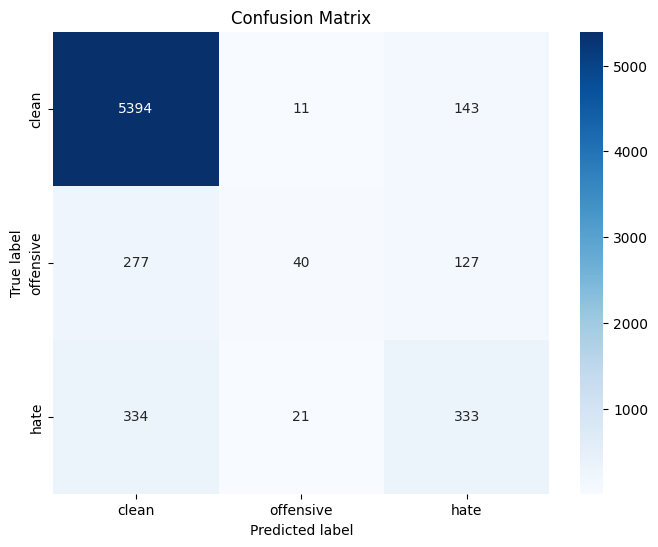

Accuracy for class 'clean': 0.97
Accuracy for class 'offensive': 0.09
Accuracy for class 'hate': 0.48

Metrics for Offensive Class:
Precision: 0.56
Recall: 0.09
F1-Score: 0.16
Support: 444.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input, GRU, Embedding, SpatialDropout1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix

# File paths
TRAIN_FILE = '/content/train.csv'
DEV_FILE = '/content/dev.csv'
TEST_FILE = '/content/test.csv'

# Load data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['free_text'] = df['free_text'].fillna('').astype(str)  # Handle missing text
    return df['free_text'].values, df['label_id'].values

X_train, y_train = load_data(TRAIN_FILE)
X_dev, y_dev = load_data(DEV_FILE)
X_test, y_test = load_data(TEST_FILE)

# Tokenizer and preprocessing
tokenizer = Tokenizer(num_words=25000)  # Increased number of words in tokenizer
tokenizer.fit_on_texts(X_train)  # Fit tokenizer on training data

def preprocess_text(X, y, tokenizer, maxlen=150):  # Adjusted maxlen
    """Tokenize and pad text sequences, one-hot encode labels."""
    X_seq = tokenizer.texts_to_sequences(X)
    X_pad = pad_sequences(X_seq, maxlen=maxlen)  # Pad sequences to the same length
    y_cat = to_categorical(y, num_classes=3)  # One-hot encode labels
    return X_pad, y_cat

maxlen = 150  # Adjusted sequence length
X_train_pad, y_train_cat = preprocess_text(X_train, y_train, tokenizer, maxlen)
X_dev_pad, y_dev_cat = preprocess_text(X_dev, y_dev, tokenizer, maxlen)
X_test_pad, y_test_cat = preprocess_text(X_test, y_test, tokenizer, maxlen)

# Build modified GRU model with variations
embedding_dim = 128
input_layer = Input(shape=(maxlen,))
x = Embedding(input_dim=25000, output_dim=embedding_dim)(input_layer)
x = SpatialDropout1D(0.3)(x)  # Increased dropout rate

# Experimenting with different GRU configurations
x = GRU(100, return_sequences=True)(x)  # GRU with 100 units (first variation)
#x = GRU(150, return_sequences=True)(x)  # GRU with 150 units (second variation)
#x = GRU(200, return_sequences=True)(x)  # GRU with 200 units (third variation)

avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, max_pool])
x = Dropout(0.2)(conc)  # Added dropout after concatenation

output_layer = Dense(3, activation='softmax')(x)  # 3 classes: clean, offensive, hate

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_pad, y_train_cat, batch_size=128, epochs=10, validation_data=(X_dev_pad, y_dev_cat), verbose=1)  # Increased epochs

# Evaluate the model
y_pred = model.predict(X_test_pad, batch_size=128).argmax(axis=-1)  # Predicted classes
y_true = y_test  # True classes

# Classification report
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=["clean", "offensive", "hate"], output_dict=True)
print(classification_report(y_true, y_pred, target_names=["clean", "offensive", "hate"]))

# Confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred, labels=[0, 1, 2])
print("\nConfusion Matrix:")
print(cf_matrix)

# Plot confusion matrix
labels = ["clean", "offensive", "hate"]
df_cm = pd.DataFrame(cf_matrix, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sn.heatmap(df_cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Calculate per-class accuracy
accuracy_per_class = cf_matrix.diagonal() / cf_matrix.sum(axis=1)
for i, label in enumerate(labels):
    print(f"Accuracy for class '{label}': {accuracy_per_class[i]:.2f}")

# Explicit Offensive Class Metrics
offensive_metrics = report["offensive"]
print("\nMetrics for Offensive Class:")
print(f"Precision: {offensive_metrics['precision']:.2f}")
print(f"Recall: {offensive_metrics['recall']:.2f}")
print(f"F1-Score: {offensive_metrics['f1-score']:.2f}")
print(f"Support: {offensive_metrics['support']}")
